                                                handle the Missing data

In [2]:
import pandas as pd
import numpy as np
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv("data_preprocessing.csv")
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


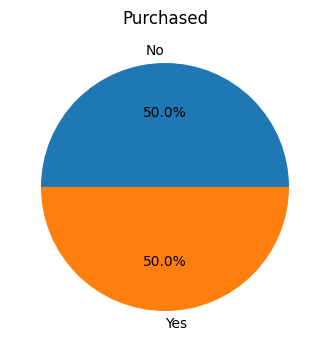

In [7]:
plt.figure(figsize=(4,6))
heart_rate= data['Purchased'].value_counts()
plt.pie(heart_rate.values, labels=heart_rate.index, autopct= '%1.1f%%')
plt.title('Purchased')
plt.show()

C:\Users\sanju\AppData\Local\Temp\ipykernel_17832\567961163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age', palette='viridis', order=age_order)


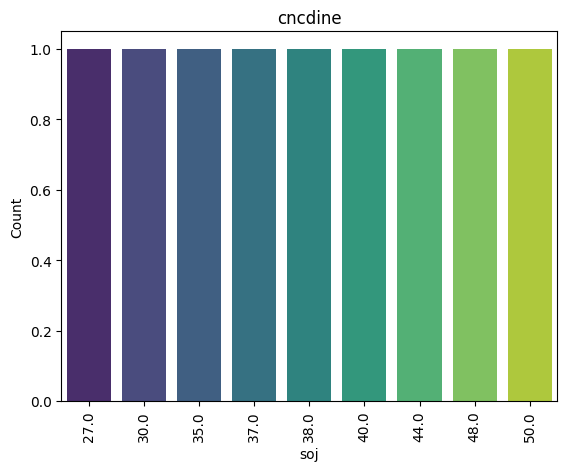

In [10]:
# Define the order of age categories
age_order = data['Age'].value_counts().index.sort_values()
sns.countplot(data=data, x='Age', palette='viridis', order=age_order)
plt.title('cncdine')
plt.xlabel('soj')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [20]:

imputer= SimpleImputer(missing_values =np.nan, strategy='mean')
data[['Age','Salary']]=imputer.fit_transform(data[['Age','Salary']]).astype('int64')
data.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.700000,63777.700000
std,7.257946,11564.099408
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.000000,62388.500000
75%,43.000000,70750.000000
max,50.000000,83000.000000


In [5]:
data.isna().sum()


Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [6]:
data.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.700000,63777.700000
std,7.257946,11564.099408
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.000000,62388.500000
75%,43.000000,70750.000000
max,50.000000,83000.000000


In [6]:
data['Country'] = LabelEncoder().fit_transform(data['Country'])
data['Purchased'] = LabelEncoder().fit_transform(data['Purchased'])
data

,Country,Age,Salary,Purchased
0,0,44,72000,0
1,2,27,48000,1
2,1,30,54000,0
3,2,38,61000,0
4,1,40,63777,1
5,0,35,58000,1
6,2,38,52000,0
7,0,48,79000,1
8,1,50,83000,0
9,0,37,67000,1


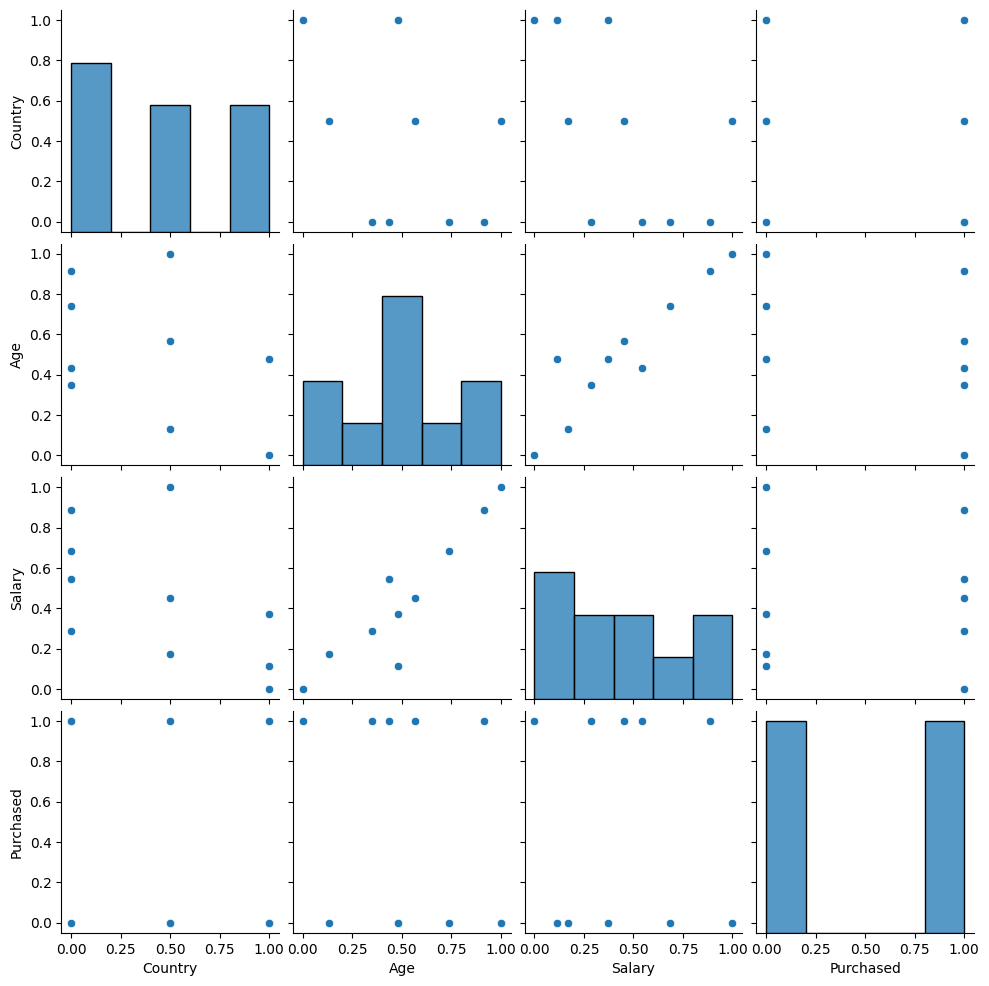

In [8]:
from sklearn.preprocessing import MinMaxScaler
scalar =MinMaxScaler()
scalar_df=scalar.fit_transform(data)
data1 =pd.DataFrame(scalar_df, columns=['Country','Age','Salary','Purchased'])
sns.pairplot(data1)

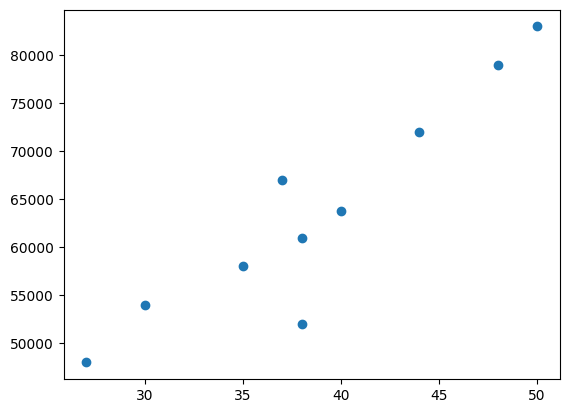

In [11]:
plt.scatter(data['Age'],data['Salary'])

In [13]:
X = data[['Age','Purchased']]
y = data['Salary'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train


,Age,Purchased
8,50,0
1,27,1
2,30,0
4,40,1
5,35,1
9,37,1
6,38,0
0,44,0


In [14]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train, y_train)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1)
lin.predict(X_test)


array([79237.31355253, 61468.28989575])

In [15]:
y_test

7    79000
3    61000
Name: Salary, dtype: int64

In [16]:
lin.score(X_test,y_test)

0.9982986842674451